<a href="https://colab.research.google.com/github/Chania12/LDA-and-TF-IDF-for-Airbnb-Review/blob/main/Airbnb_Review_and_Urban_Livability_Gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Latent Dirichlet Analysis**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install pyLDAvis


import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

**Implementation of LDA using Gensim Package**

In [ ]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import names
from nltk.corpus import wordnet as wn

import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
!pip install geopandas
import geopandas as gpd
!pip install mapclassify
import mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 42.2 MB/s 
     |████████████████████████████████| 16.7 MB 52.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

reviews = pd.read_csv("/content/drive/MyDrive/Colabnotebooks/reviews.csv")
listings = pd.read_csv("/content/drive/MyDrive/Colabnotebooks/listings.csv")

Mounted at /content/drive


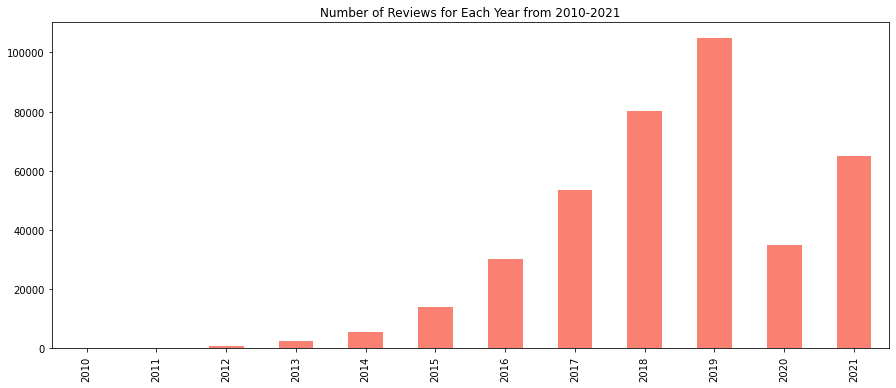

In [ ]:
reviews.date.astype(str).str[0:4].value_counts().sort_index().plot(kind='bar', figsize=(15,6), title= 'Number of Reviews for Each Year from 2010-2021', color='salmon')

In [ ]:
# save columns in reviews dataframe that are needed for later analyses
reviews_trim = reviews[['listing_id', 'comments']]
reviews_trim1 = reviews_trim.dropna(axis=0, how='any')
# column name-change listing_id to id
reviews_trim2 = reviews_trim1.rename(columns = {'listing_id':'id'})

In [ ]:
# only include column in listing useful for later analyses
listings_trim = listings[['id', 'host_is_superhost', 'price','number_of_reviews', 'review_scores_rating']]
listings_trim1 = listings_trim.dropna(axis=0, how='any')

# merge reviews and listings dataframes
text = pd.merge(reviews_trim2, listings_trim1, on = 'id')

text

,id,comments,host_is_superhost,price,number_of_reviews,review_scores_rating
0,15420,My wife and I stayed at this beautiful apartme...,t,$80.00,376,4.97
1,15420,Charlotte couldn't have been a more thoughtful...,t,$80.00,376,4.97
2,15420,I went to Edinburgh for the second time on Apr...,t,$80.00,376,4.97
3,15420,This flat was incredible. As other guests have...,t,$80.00,376,4.97
4,15420,Fantastic host and the apartment was perfect. ...,t,$80.00,376,4.97
...,...,...,...,...,...,...
392355,53573490,"A very warm and friendly welcome, Graeme was g...",f,$30.00,2,5.00
392356,53590098,The apartment is fantastic. clean. and the b...,f,$114.00,1,5.00
392357,53670160,We were very happy to be Ross and Claire’s fir...,f,$40.00,2,5.00
392358,53670160,We had a great time seeing Edinburgh while sta...,f,$40.00,2,5.00


In [ ]:
review_comment=text[['id','comments']]
review_comment

,id,comments
0,15420,My wife and I stayed at this beautiful apartme...
1,15420,Charlotte couldn't have been a more thoughtful...
2,15420,I went to Edinburgh for the second time on Apr...
3,15420,This flat was incredible. As other guests have...
4,15420,Fantastic host and the apartment was perfect. ...
...,...,...
392355,53573490,"A very warm and friendly welcome, Graeme was g..."
392356,53590098,The apartment is fantastic. clean. and the b...
392357,53670160,We were very happy to be Ross and Claire’s fir...
392358,53670160,We had a great time seeing Edinburgh while sta...


In [ ]:
text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392360 entries, 0 to 392359
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    392360 non-null  int64  
 1   comments              392360 non-null  object 
 2   host_is_superhost     392360 non-null  object 
 3   price                 392360 non-null  object 
 4   number_of_reviews     392360 non-null  int64  
 5   review_scores_rating  392360 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 21.0+ MB


In [ ]:
#Entire_home =text[[]]

**Clean text data for analyses**

In [ ]:
# create a column for whether a review is an automated posting (yes, no)
def autopost(x):
    if 'an automated posting' in x:
        return 'yes'
    else:
        return 'no'
text['auto_posting'] = text['comments'].apply(autopost)

In [ ]:
import nltk
nltk.download('words')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('names')
nltk.download('omw-1.4')

stpwrds=nltk.corpus.stopwords.words('english')
stopwords_add = ['however', 'br','us','from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come']
stpwrds.extend(stopwords_add)

# prepare for nonenglish review removal
# nonenglish stopwords
#stopwords_en = set(stopwords.words('english')) #english stopwords
stopwords_en = set(stpwrds) #english stopwords
stopwords_nonen = set(stopwords.words()) - stopwords_en

# english vocab
envocab = set(w.lower() for w in nltk.corpus.words.words())
# nonenglish stopwords that are not also english words
stopwords_nonenonly = set(stopwords_nonen - stopwords_nonen.intersection(envocab))



[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# create a column for whether review is in english (yes, no)
tokenizer = RegexpTokenizer(r'\w+')
def en(x):
    tokens = set(tokenizer.tokenize(x.lower()))
    if len(tokens & stopwords_nonenonly) == 0: # if none of the tokens is a nonenglish stopwords
        return 'yes'
    else:
        return 'no'
text['en'] = text['comments'].apply(en)    

In [ ]:
# create a dataframe with reviews that are not auto postings and that are in english
text_use = text.loc[(text['auto_posting']=='no') & (text['en']=='yes')]

In [ ]:
# remove 'URL HIDDEN' in reviews
reviews_nonurl = []
for comment in text_use['comments']:
    review = re.sub('URL HIDDEN', '', comment)
    reviews_nonurl.append(review)

In [ ]:
# preparing for text preprocessing
# tokenizer
tokenizer = RegexpTokenizer(r'\w+')
# stopwords 
stopwords_en = set(stpwrds)
# personal names (which appear to occur very frequently)
names = set(names.words())
# lemmatizer
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

In [ ]:
# text preprocessing
cleaned_data = []
for review in reviews_nonurl:
    tokens = tokenizer.tokenize(review) # tokenize
    tokens = [w.lower() for w in tokens if w not in names and len(w)>1]   # remove personal names, remove 1-char tokens, lowercase
    tokens = [get_lemma(w) for w in tokens if w not in stopwords_en]      # remove english stopwords, lemmatize
    cleaned_data.append(tokens)

In [ ]:
# save cleaned data as a column in text_use dataframe
text_use.loc[:, 'cleaned_data'] = cleaned_data

In [ ]:
# calculate length of each review
text_use['review_length'] = text_use['cleaned_data'].apply(len)

In [ ]:
# for lda, remove reviews with fewer than 10 tokens, save as a new df
text_lda = text_use[text_use['review_length'] > 9]
text_lda

,id,comments,host_is_superhost,price,number_of_reviews,review_scores_rating,auto_posting,en,cleaned_data,review_length
0,15420,My wife and I stayed at this beautiful apartme...,t,$80.00,376,4.97,no,yes,"[wife, stay, beautiful, apartment, stay, spect...",56
1,15420,Charlotte couldn't have been a more thoughtful...,t,$80.00,376,4.97,no,yes,"[thoughtful, accomodating, host, flat, literal...",28
2,15420,I went to Edinburgh for the second time on Apr...,t,$80.00,376,4.97,no,yes,"[go, edinburgh, second, time, 2011, thanks, fl...",45
3,15420,This flat was incredible. As other guests have...,t,$80.00,376,4.97,no,yes,"[flat, incredible, guest, mention, attention, ...",46
4,15420,Fantastic host and the apartment was perfect. ...,t,$80.00,376,4.97,no,yes,"[fantastic, host, apartment, perfect, locate, ...",16
...,...,...,...,...,...,...,...,...,...,...
392351,53536042,Safdar and his wife were very welcoming to us....,f,$49.00,2,5.00,no,yes,"[safdar, wife, welcome, felt, like, home, defi...",13
392352,53538614,"Isaac was a great host, great communication. T...",f,$121.00,2,4.50,no,yes,"[great, host, great, communication, attention,...",25
392354,53573490,What a kind hearted man. If you need somewhere...,f,$30.00,2,5.00,no,yes,"[kind, hearted, man, somewhere, escape, bit, d...",11
392358,53670160,We had a great time seeing Edinburgh while sta...,f,$40.00,2,5.00,no,yes,"[great, time, seeing, edinburgh, stay, apartme...",11


In [ ]:
lda_topic=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lda.csv')
lda_topic['Texts'] = lda_topic['Text'].str.replace('\W', '')
lda_topic

,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Texts
0,0,0,0.0,0.3529,"great, location, apartment, walking, restauran...","['wife', 'stay', 'beautiful', 'apartment', 'st...",wifestaybeautifulapartmentstayspectacularneigh...
1,1,1,3.0,0.7148,"stay, great, location, recommend, clean, apart...","['thoughtful', 'accomodating', 'host', 'flat',...",thoughtfulaccomodatinghostflatliterallyeveryth...
2,2,2,0.0,0.3877,"great, location, apartment, walking, restauran...","['go', 'edinburgh', 'second', 'time', '2011', ...",goedinburghsecondtime2011thanksflatstayamazefl...
3,3,3,5.0,0.2915,"home, place, best, edinburgh, airbnb, love, be...","['flat', 'incredible', 'guest', 'mention', 'at...",flatincredibleguestmentionattention_detailunri...
4,4,4,0.0,0.6618,"great, location, apartment, walking, restauran...","['fantastic', 'host', 'apartment', 'perfect', ...",fantastichostapartmentperfectlocatewithinwalki...
...,...,...,...,...,...,...,...
260857,260857,260857,3.0,0.3232,"stay, great, location, recommend, clean, apart...","['great', 'host', 'great', 'communication', 'a...",greathostgreatcommunicationattention_detailroo...
260858,260858,260858,6.0,0.4100,"flat, picture, exactly, apartment, expect, tim...","['kind', 'hearted', 'man', 'somewhere', 'escap...",kindheartedmansomewhereescapebitdeforecommendd...
260859,260859,260859,5.0,0.4334,"home, place, best, edinburgh, airbnb, love, be...","['happy', 'first', 'guest', 'greet', 'warmly',...",happyfirstguestgreetwarmlymakeavailableanythin...
260860,260860,260860,3.0,0.7323,"stay, great, location, recommend, clean, apart...","['great', 'time', 'seeing', 'edinburgh', 'stay...",greattimeseeingedinburghstayapartmentlovelylov...


In [ ]:
data_words=text_lda['cleaned_data']
data_words

0         [wife, stay, beautiful, apartment, stay, spect...
1         [thoughtful, accomodating, host, flat, literal...
2         [go, edinburgh, second, time, 2011, thanks, fl...
3         [flat, incredible, guest, mention, attention, ...
4         [fantastic, host, apartment, perfect, locate, ...
                                ...                        
392351    [safdar, wife, welcome, felt, like, home, defi...
392352    [great, host, great, communication, attention,...
392354    [kind, hearted, man, somewhere, escape, bit, d...
392358    [great, time, seeing, edinburgh, stay, apartme...
392359    [super, affordable, stylish, cosy, comfortable...
Name: cleaned_data, Length: 233495, dtype: object

In [ ]:
#BIGRAMS AND TRIGRAMS
bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold=100)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)



In [ ]:
print (data_bigrams_trigrams[9][0:20])

['certainly', 'stay', 'perfect', 'edinburgh', 'originally', 'travelling', 'month', 'old', 'daughter', 'visit', 'relative', 'friend', 'need', 'extra', 'help', 'little', 'one', 'accommodate', 'recommend', 'apartment']


In [ ]:
#TF-IDF REMOVAL
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]
# print (corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] 
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

**Checking Coherence based on BoW Corpus**

**Coherence Score**

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics,  alpha='auto', eta='auto', id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
start=2; limit=16; step=2
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus[:-1], texts=texts, start=start, limit=limit, step=step)

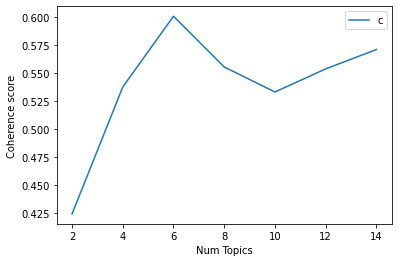

In [ ]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

**10 Topics**

In [ ]:
# Train LDA model
%%time
lda_model2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                             num_topics=10,
                                             alpha='auto',
                                             eta='auto',
                                             id2word=id2word,
                                             chunksize=2000,
                                             passes=20, 
                                             random_state=100,
                                             update_every=1,
                                             iterations=50,
                                             per_word_topics=True)


CPU times: user 22min 41s, sys: 14.5 s, total: 22min 56s
Wall time: 22min 46s


In [ ]:
lda_model2.save('topic.model2')

In [ ]:
# load saved lda model and print topics
loading = LdaModel.load('topic.model2')
for topic in loading.print_topics(num_words = 10):
    print(topic)

(0, '0.091*"bed" + 0.063*"kitchen" + 0.042*"bathroom" + 0.037*"comfy" + 0.034*"bedroom" + 0.033*"shower" + 0.028*"two" + 0.026*"small" + 0.022*"people" + 0.021*"space"')
(1, '0.057*"stay" + 0.057*"great" + 0.045*"location" + 0.039*"place" + 0.038*"apartment" + 0.036*"clean" + 0.035*"edinburgh" + 0.034*"flat" + 0.029*"recommend" + 0.028*"host"')
(2, '0.047*"restaurant" + 0.045*"walking" + 0.043*"area" + 0.039*"street" + 0.038*"distance" + 0.031*"shop" + 0.031*"lots" + 0.029*"town" + 0.028*"within" + 0.028*"old"')
(3, '0.260*"room" + 0.135*"house" + 0.052*"kind" + 0.035*"breakfast" + 0.031*"garden" + 0.029*"private" + 0.024*"person" + 0.021*"dog" + 0.021*"sparkling" + 0.020*"share"')
(4, '0.086*"touch" + 0.058*"coffee" + 0.039*"arrival" + 0.036*"left" + 0.035*"extra" + 0.034*"thoughtful" + 0.033*"include" + 0.031*"tea" + 0.031*"appreciate" + 0.026*"towel"')
(5, '0.061*"respond" + 0.060*"provide" + 0.056*"question" + 0.055*"help" + 0.051*"give" + 0.048*"always" + 0.042*"quickly" + 0.040*"

In [ ]:
pyLDAvis.enable_notebook()
visual = gensimvis.prepare(lda_model2, corpus, id2word, mds="mmds", R=30)
visual


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.018121  0.051076       1        1  43.825340
9      0.040350 -0.409036       2        1  11.127631
8     -0.328837 -0.128596       3        1  10.274936
2     -0.229073  0.389798       4        1   9.256315
6      0.351080 -0.337541       5        1   8.880093
0      0.414408 -0.041040       6        1   5.977447
5      0.089675  0.464164       7        1   3.301153
4     -0.282053 -0.404727       8        1   3.147396
3     -0.474435  0.135815       9        1   2.922724
7      0.400766  0.280088      10        1   1.286965, topic_info=          Term           Freq          Total Category  logprob  loglift
207       room   42732.000000   42732.000000  Default  30.0000  30.0000
132       walk   51371.000000   51371.000000  Default  29.0000  29.0000
133       city   53950.000000   53950.000000  Default  28.0000  28.0000
34        stay  140579.000000  140579.000000  Default  27.0000  27.0000
111      great  139780.000000  139780.000000  Default  26.0000  26.0000
...        ...            ...            ...      ...      ...      ...
3549        45     378.206945     378.366389  Topic10  -5.2537   4.3525
3521    permit     352.641786     352.801573  Topic10  -5.3237   4.3524
2853  resident     338.788300     338.947555  Topic10  -5.3637   4.3524
1451    carpet     340.052442     340.212303  Topic10  -5.3600   4.3524
1740     dirty     483.562518    1154.507299  Topic10  -5.0079   3.4826

[392 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
368       5  0.999967         10
95        5  1.000034         15
1418      5  1.000020         20
1813      5  0.999828         30
3549     10  0.999032         45
...     ...       ...        ...
423       2  0.999945       wish
46        4  0.999977     within
186       1  0.588071  wonderful
186       2  0.411894  wonderful
418       3  0.999925       work

[421 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 9, 3, 7, 1, 6, 5, 4, 8])

In [ ]:
pyLDAvis.save_html(visual, 'lda.html')

In [ ]:
#LDA Validation
# Compute Perplexity
print('\nPerplexity: ', lda_model2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model2, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -20.928312327704937

Coherence Score:  0.6121956700735495


**Dominant Topic**

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model2, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.3776,"stay, great, location, place, apartment, clean...","[wife, stay, beautiful, apartment, stay, spect..."
1,1,1.0,0.4826,"stay, great, location, place, apartment, clean...","[thoughtful, accomodating, host, flat, literal..."
2,2,1.0,0.4014,"stay, great, location, place, apartment, clean...","[go, edinburgh, second, time, 2011, thanks, fl..."
3,3,1.0,0.2104,"stay, great, location, place, apartment, clean...","[flat, incredible, guest, mention, attention_d..."
4,4,1.0,0.5268,"stay, great, location, place, apartment, clean...","[fantastic, host, apartment, perfect, locate, ..."
...,...,...,...,...,...
233490,233490,1.0,0.5216,"stay, great, location, place, apartment, clean...","[safdar, wife, welcome, felt, like, home, defi..."
233491,233491,1.0,0.4450,"stay, great, location, place, apartment, clean...","[great, host, great, communication, attention_..."
233492,233492,1.0,0.3373,"stay, great, location, place, apartment, clean...","[kind, hearted, man, somewhere, escape, bit, d..."
233493,233493,1.0,0.5516,"stay, great, location, place, apartment, clean...","[great, time, seeing, edinburgh, stay, apartme..."


##**TF-IDF Keyworod Extraction**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

**Implementation of LDA using Gensim Package**

In [ ]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import names
from nltk.corpus import wordnet as wn

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

reviews = pd.read_csv("/content/drive/MyDrive/Colabnotebooks/reviews.csv")
listings = pd.read_csv("/content/drive/MyDrive/Colabnotebooks/listings.csv")

Mounted at /content/drive


In [ ]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,15420,171793,2011-01-18,186358,Nels,My wife and I stayed at this beautiful apartme...
1,15420,176350,2011-01-31,95218,Gareth,Charlotte couldn't have been a more thoughtful...
2,15420,232149,2011-04-19,429751,Guido,I went to Edinburgh for the second time on Apr...
3,15420,236073,2011-04-23,420830,Mariah,This flat was incredible. As other guests have...
4,15420,263713,2011-05-15,203827,Linda,Fantastic host and the apartment was perfect. ...
...,...,...,...,...,...,...
392473,53573490,515056843584009514,2021-12-11,435321565,Vincent,"A very warm and friendly welcome, Graeme was g..."
392474,53590098,512111357889349602,2021-12-07,100518053,Joao,The apartment is fantastic. clean. and the b...
392475,53670160,515005486156658323,2021-12-11,16508110,Nele,We were very happy to be Ross and Claire’s fir...
392476,53670160,515783428877678131,2021-12-12,419795340,Briain,We had a great time seeing Edinburgh while sta...


In [ ]:
reviews_by_listings=reviews.groupby('listing_id').count()
reviews_by_listings=reviews_by_listings[['comments']]
reviews_by_listings.to_excel(excel_writer='review by listings.xlsx')
#100=reviews_by_listings.sort_values('comments', ascending=False).head(100)


In [ ]:
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
!pip install geopandas
import geopandas as gpd
!pip install mapclassify
import mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 525 kB/s 
     |████████████████████████████████| 6.3 MB 42.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


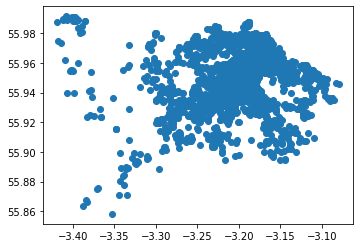

In [ ]:
listings_zone=gpd.read_file('/content/drive/MyDrive/Colab Notebooks/listings_zone.shp')
#print(listings_zone.columns)
comment=listings.merge(reviews_by_listings, left_on='id', right_on='listing_id')
comment
#comment.to_csv(path_or_buf='/content/drive/MyDrive/Colab Notebooks/comment.csv')
comment_gdf=gpd.GeoDataFrame(comment, geometry=gpd.points_from_xy(comment['longitude'], comment['latitude'])).set_crs(epsg=4326)
comment_gdf.set_crs(epsg=4326).plot()
comment_gdf.set_crs(epsg=4326).to_file('/content/drive/MyDrive/Colab Notebooks/comment.shp')

In [ ]:
comment_gdf

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,comments,geometry
0,15420,https://www.airbnb.com/rooms/15420,20211212213544,2021-12-13,Georgian Boutique Apt City Centre,"Stunning, impeccably refurbished spacious grou...","The neighbourhood is in the historic New Town,...",https://a0.muscache.com/pictures/cf69631f-4194...,60423,https://www.airbnb.com/users/show/60423,...,4.89,NaN,f,1,1,0,0,2.83,376,POINT (-3.18805 55.95759)
1,24288,https://www.airbnb.com/rooms/24288,20211212213544,2021-12-12,"Cool central Loft, sleeps 4, 2 double bed+en-s...",Upper level of duplex. Boho rustic-chic former...,It's all in the mix: Culture-museums and galle...,https://a0.muscache.com/pictures/3460007/88731...,46498,https://www.airbnb.com/users/show/46498,...,4.60,NaN,t,1,1,0,0,1.67,228,POINT (-3.18445 55.94383)
2,38628,https://www.airbnb.com/rooms/38628,20211212213544,2021-12-13,Edinburgh Holiday Let,Brunstane - Daiches Braes (close to Portobello...,Quiet and easy access to outside.,https://a0.muscache.com/pictures/d9885120-178e...,165635,https://www.airbnb.com/users/show/165635,...,4.84,NaN,f,2,2,0,0,0.62,57,POINT (-3.09640 55.94215)
3,44552,https://www.airbnb.com/rooms/44552,20211212213544,2021-12-13,Double room - spacious Leith flat,Pleasant double room in 2 bedroom ground floor...,NaN,https://a0.muscache.com/pictures/454814/0e351a...,195950,https://www.airbnb.com/users/show/195950,...,4.72,NaN,f,2,0,2,0,1.51,208,POINT (-3.17184 55.96612)
4,48645,https://www.airbnb.com/rooms/48645,20211212213544,2021-12-13,Large sunny room on Royal Mile,The apartment is directily on the Royal Mile a...,The Canongate is an area rich in culture and h...,https://a0.muscache.com/pictures/miso/Hosting-...,221474,https://www.airbnb.com/users/show/221474,...,4.77,NaN,t,2,1,1,0,6.61,875,POINT (-3.18305 55.95072)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5460,53538614,https://www.airbnb.com/rooms/53538614,20211212213544,2021-12-13,Double room 15 mins away from the Christmas ma...,Cozy double bedroom close to the city centre! ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,80189794,https://www.airbnb.com/users/show/80189794,...,4.50,NaN,t,1,0,1,0,2.00,2,POINT (-3.17146 55.95747)
5461,53573490,https://www.airbnb.com/rooms/53573490,20211212213544,2021-12-13,"Quiet Room, 15 min walk from Old Town or Leith",This quiet room is located in the perfect loca...,This end of Easter Road has really developed i...,https://a0.muscache.com/pictures/b6bf5c8c-e5cf...,151483129,https://www.airbnb.com/users/show/151483129,...,5.00,NaN,t,1,0,1,0,2.00,2,POINT (-3.17078 55.95865)
5462,53590098,https://www.airbnb.com/rooms/53590098,20211212213544,2021-12-13,Stylish & modern 2 bed City Centre - free parking,The apartment is in a very central location an...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,65947530,https://www.airbnb.com/users/show/65947530,...,5.00,NaN,t,1,1,0,0,1.00,1,POINT (-3.17533 55.96043)
5463,53670160,https://www.airbnb.com/rooms/53670160,20211212213544,2021-12-13,Private cosy bedroom & bathroom,This is a ground floor flat in the East Craigs...,NaN,https://a0.muscache.com/pictures/a877de24-cb47...,102685412,https://www.airbnb.com/users/show/102685412,...,5.00,NaN,f,1,0,1,0,2.00,2,POINT (-3.31191 55.94814)


In [ ]:
comment_gdf.to_file('/content/drive/MyDrive/Colab Notebooks/comment.shp')

In [ ]:
listings_zone1=listings_zone[['id','Name_1', 'latitude', 'longitude']]
listings_zone1

,id,Name_1,latitude,longitude
0,984471,Balerno and Bonnington Village,55.88883,-3.34193
1,12089682,Balerno and Bonnington Village,55.86746,-3.38396
2,15376173,Balerno and Bonnington Village,55.87124,-3.33454
3,19547099,Balerno and Bonnington Village,55.88358,-3.33917
4,24703715,Balerno and Bonnington Village,55.88059,-3.34239
...,...,...,...,...
6109,35465398,None,55.98769,-3.18847
6110,36313659,None,55.98693,-3.19020
6111,44049867,None,55.98397,-3.19503
6112,45088829,None,55.98010,-3.29993


In [ ]:
zone=listings_zone1.groupby('Name_1').count()
zone
data=zone.sort_values('id', ascending=False).head(10)
data=data.reset_index()
data=data.rename({'Name_1':'zone','id':'listings count'},axis=1)
data

,zone,listings count,latitude,longitude
0,"Old Town, Princes Street and Leith Street",705,705,705
1,Deans Village,428,428,428
2,Tollcross,310,310,310
3,Hillside and Calton Hill,232,232,232
4,New Town West,220,220,220
5,Dalry and Fountainbridge,219,219,219
6,Meadows and Southside,200,200,200
7,New Town East and Gayfield,190,190,190
8,Stockbridge,177,177,177
9,"Canongate, Southside and Dumbiedykes",167,167,167


Text(0.5, 1.0, 'Edinburgh Intermediate Zones with 10 Highest Airbnb Listings')

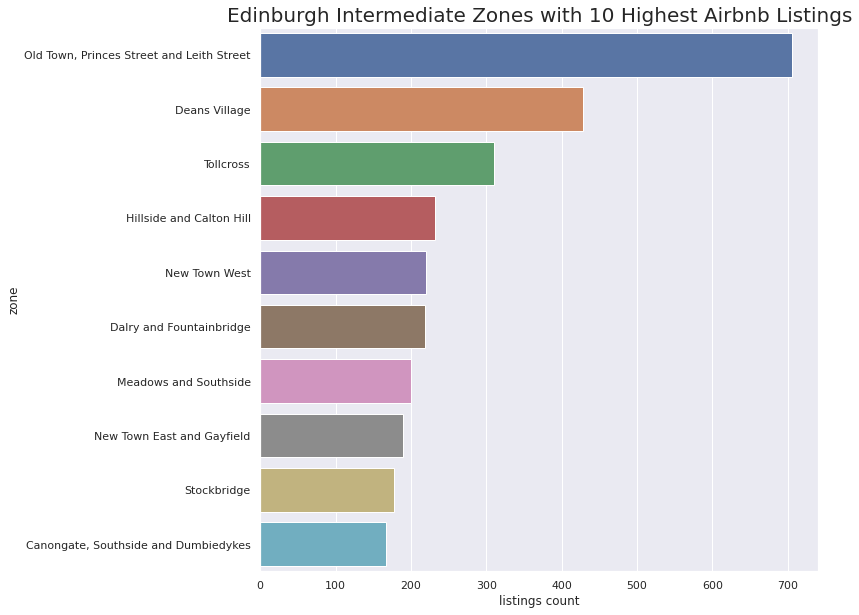

In [ ]:
import seaborn as sns

fig = plt.gcf()
fig.set_size_inches(10,10)
sns.set_style('whitegrid')
sns.set(font_scale=1)
ax=sns.barplot(y='zone',x='listings count', data=data)
ax.set_title('Edinburgh Intermediate Zones with 10 Highest Airbnb Listings', size=20)
#ax.set_xlabel('')
#for item in ax.get_xticklabels():
    #item.set_rotation(90)

In [ ]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,15420,171793,2011-01-18,186358,Nels,My wife and I stayed at this beautiful apartme...
1,15420,176350,2011-01-31,95218,Gareth,Charlotte couldn't have been a more thoughtful...
2,15420,232149,2011-04-19,429751,Guido,I went to Edinburgh for the second time on Apr...
3,15420,236073,2011-04-23,420830,Mariah,This flat was incredible. As other guests have...
4,15420,263713,2011-05-15,203827,Linda,Fantastic host and the apartment was perfect. ...
...,...,...,...,...,...,...
392473,53573490,515056843584009514,2021-12-11,435321565,Vincent,"A very warm and friendly welcome, Graeme was g..."
392474,53590098,512111357889349602,2021-12-07,100518053,Joao,The apartment is fantastic. clean. and the b...
392475,53670160,515005486156658323,2021-12-11,16508110,Nele,We were very happy to be Ross and Claire’s fir...
392476,53670160,515783428877678131,2021-12-12,419795340,Briain,We had a great time seeing Edinburgh while sta...


In [ ]:
# save columns in reviews dataframe that are needed for later analyses
reviews_trim = reviews[['listing_id', 'comments']]
reviews_trim1 = reviews_trim.dropna(axis=0, how='any')
# column name-change listing_id to id
reviews1 = reviews_trim1.rename(columns = {'listing_id':'id'})

In [ ]:
reviews1

,id,comments
0,15420,My wife and I stayed at this beautiful apartme...
1,15420,Charlotte couldn't have been a more thoughtful...
2,15420,I went to Edinburgh for the second time on Apr...
3,15420,This flat was incredible. As other guests have...
4,15420,Fantastic host and the apartment was perfect. ...
...,...,...
392473,53573490,"A very warm and friendly welcome, Graeme was g..."
392474,53590098,The apartment is fantastic. clean. and the b...
392475,53670160,We were very happy to be Ross and Claire’s fir...
392476,53670160,We had a great time seeing Edinburgh while sta...


In [ ]:
def get_stopwords_list(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return list(frozenset(stop_set))

In [ ]:
def clean_text(text):
    """Doc cleaning"""
    
    # Lowering text
    text = text.lower()
    
    # Removing punctuation
    text = "".join([c for c in text if c not in PUNCTUATION])
    
    # Removing whitespace and newlines
    text = re.sub('\s+',' ',text)
    
    text = re.sub('br',' ',text)


    return text

In [ ]:
def sort_coo(coo_matrix):
    """Sort a dict with highest score"""
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
    
    #create a tuples of feature, score
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [ ]:
def get_keywords(vectorizer, feature_names, doc):
    """Return top k keywords from a doc using TF-IDF method"""

    #generate tf-idf for the given document
    tf_idf_vector = vectorizer.transform([doc])
    
    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only TOP_K_KEYWORDS
    keywords=extract_topn_from_vector(feature_names,sorted_items,TOP_K_KEYWORDS)
    
    return list(keywords.keys())

In [ ]:
# Constants
PUNCTUATION = """!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""" 
TOP_K_KEYWORDS = 10 # top k number of keywords to retrieve in a ranked document
STOPWORD_PATH = "/kaggle/input/stopwords/stopwords.txt"
PAPERS_PATH = "/kaggle/input/nips-papers-1987-2019-updated/papers.csv"


In [ ]:
import nltk
nltk.download('words')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('names')
nltk.download('omw-1.4')

def convert(set):
    return [set, ]
names_remove=convert(names)

stpwrds=nltk.corpus.stopwords.words('english')
stopwords_add = ['edinburgh','charlotte', 'shaun','mark','gordon', 'br','us','from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come']
stpwrds.extend(stopwords_add)
stpwrds.extend(names_remove)

# prepare for nonenglish review removal
# nonenglish stopwords
#stopwords_en = set(stopwords.words('english')) #english stopwords
stopwords_en = set(stpwrds) #english stopwords
stopwords_nonen = set(stopwords.words()) - stopwords_en

# english vocab
envocab = set(w.lower() for w in nltk.corpus.words.words())
# nonenglish stopwords that are not also english words
stopwords_nonenonly = set(stopwords_nonen - stopwords_nonen.intersection(envocab))



[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
#load a set of stop words
stopwords=stpwrds


In [ ]:
reviews1['comments'] = reviews1['comments'].apply(clean_text)

In [ ]:
reviews1

,id,comments
0,15420,my wife and i stayed at this beautiful apartme...
1,15420,charlotte couldnt have been a more thoughtful ...
2,15420,i went to edinburgh for the second time on apr...
3,15420,this flat was incredible as other guests have ...
4,15420,fantastic host and the apartment was perfect l...
...,...,...
392473,53573490,a very warm and friendly welcome graeme was gr...
392474,53590098,the apartment is fantastic clean and the beds ...
392475,53670160,we were very happy to be ross and claire’s fir...
392476,53670160,we had a great time seeing edinburgh while sta...


In [ ]:
# create a column for whether review is in english (yes, no)
tokenizer = RegexpTokenizer(r'\w+')
def en(x):
    tokens = set(tokenizer.tokenize(x.lower()))
    if len(tokens & stopwords_nonenonly) == 0: # if none of the tokens is a nonenglish stopwords
        return 'yes'
    else:
        return 'no'
reviews1['en'] = reviews1['comments'].apply(en)    

In [ ]:
# create a dataframe with reviews that are not auto postings and that are in english
review_use = reviews1.loc[(reviews1['en']=='yes')]

In [ ]:
review_use

,id,comments,en
0,15420,my wife and i stayed at this beautiful apartme...,yes
2,15420,i went to edinburgh for the second time on apr...,yes
3,15420,this flat was incredible as other guests have ...,yes
4,15420,fantastic host and the apartment was perfect l...,yes
5,15420,charlotte is an excellent and wellorganised ho...,yes
...,...,...,...
392472,53573490,what a kind hearted man if you need somewhere ...,yes
392473,53573490,a very warm and friendly welcome graeme was gr...,yes
392474,53590098,the apartment is fantastic clean and the beds ...,yes
392476,53670160,we had a great time seeing edinburgh while sta...,yes


In [ ]:
# remove 'URL HIDDEN' in reviews
reviews_nonurl = []
for comment in review_use['comments']:
    review = re.sub('URL HIDDEN', '', comment)
    reviews_nonurl.append(review)

In [ ]:
# preparing for text preprocessing
# tokenizer
tokenizer = RegexpTokenizer(r'\w+')
# stopwords 
stopwords_en = set(stpwrds)
# personal names (which appear to occur very frequently)
names = set(names.words())
# lemmatizer
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

In [ ]:
# text preprocessing
cleaned_data = []
for review in reviews_nonurl:
    tokens = tokenizer.tokenize(review) # tokenize
    tokens = [w.lower() for w in tokens if w not in names and len(w)>1]   # remove personal names, remove 1-char tokens, lowercase
    tokens = [get_lemma(w) for w in tokens if w not in stopwords_en]      # remove english stopwords, lemmatize
    cleaned_data.append(tokens)

In [ ]:
# save cleaned data as a column in text_use dataframe
review_use.loc[:, 'cleaned_data'] = cleaned_data

In [ ]:
review_use

,id,comments,en,cleaned_data
0,15420,my wife and i stayed at this beautiful apartme...,yes,"[wife, stay, beautiful, apartment, stay, spect..."
2,15420,i went to edinburgh for the second time on apr...,yes,"[go, second, time, april, 2011, thanks, charlo..."
3,15420,this flat was incredible as other guests have ...,yes,"[flat, incredible, guest, mention, charlotte, ..."
4,15420,fantastic host and the apartment was perfect l...,yes,"[fantastic, host, apartment, perfect, locate, ..."
5,15420,charlotte is an excellent and wellorganised ho...,yes,"[excellent, wellorganised, host, apartment, pe..."
...,...,...,...,...
392472,53573490,what a kind hearted man if you need somewhere ...,yes,"[kind, hearted, man, somewhere, escape, bit, d..."
392473,53573490,a very warm and friendly welcome graeme was gr...,yes,"[warm, friendly, welcome, graeme, great, well,..."
392474,53590098,the apartment is fantastic clean and the beds ...,yes,"[apartment, fantastic, clean, bed, comfortable..."
392476,53670160,we had a great time seeing edinburgh while sta...,yes,"[great, time, seeing, stay, ross, claire, apar..."


In [ ]:
id=review_use['id'].to_frame()

In [ ]:
#corpora of 1000 reviews sample
#corpora=reviews_samples['comments'].to_list()
corpora=review_use['comments']

In [ ]:
corpora

0         my wife and i stayed at this beautiful apartme...
2         i went to edinburgh for the second time on apr...
3         this flat was incredible as other guests have ...
4         fantastic host and the apartment was perfect l...
5         charlotte is an excellent and wellorganised ho...
                                ...                        
392472    what a kind hearted man if you need somewhere ...
392473    a very warm and friendly welcome graeme was gr...
392474    the apartment is fantastic clean and the beds ...
392476    we had a great time seeing edinburgh while sta...
392477    super affordable stylish cosy comfortable stay...
Name: comments, Length: 326500, dtype: object

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = corpora
vectorizer = TfidfVectorizer(strip_accents='unicode', max_df=0.85, min_df=0.05,ngram_range = (1,3), stop_words=stpwrds)
X = vectorizer.fit_transform(corpora)

df_tf_idf = pd.DataFrame(
    data=X.todense().round(2),
    columns=vectorizer.get_feature_names()
)

In [ ]:
df_tf_idf

,amazing,apartment,area,away,back,beautiful,bed,bus,central,centre,...,staying,super,thanks,time,town,walk,walking,walking distance,well,wonderful
0,0.00,0.36,0.00,0.00,0.0,0.26,0.0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.27,0.30,0.00,0.0
1,0.23,0.00,0.25,0.00,0.0,0.00,0.0,0.00,0.26,0.0,...,0.00,0.00,0.25,0.23,0.00,0.00,0.24,0.25,0.00,0.0
2,0.00,0.00,0.00,0.64,0.0,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.49,0.00,0.00,0.00,0.0
3,0.00,0.19,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.31,0.00,0.00,0.00,0.28,0.30,0.00,0.0
4,0.00,0.25,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326495,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
326496,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.58,0.0
326497,0.00,0.35,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
326498,0.00,0.25,0.00,0.00,0.0,0.00,0.0,0.39,0.00,0.0,...,0.41,0.00,0.00,0.37,0.38,0.00,0.00,0.00,0.00,0.0


In [ ]:
keyword_tf_idf=[]
for col in df_tf_idf.columns:
  keyword={}
  keyword['keyword']=col
  keyword_tf_idf.append(keyword)

key_word=pd.DataFrame(keyword_tf_idf)
#C

In [ ]:
tfidf_value=id.join(df_tf_idf, how='inner')
tfidf_value

,id,amazing,apartment,area,away,back,beautiful,bed,bus,central,...,staying,super,thanks,time,town,walk,walking,walking distance,well,wonderful
0,15420,0.0,0.36,0.0,0.00,0.0,0.26,0.0,0.00,0.0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.27,0.3,0.00,0.0
2,15420,0.0,0.00,0.0,0.64,0.0,0.00,0.0,0.00,0.0,...,0.00,0.0,0.00,0.00,0.00,0.49,0.00,0.0,0.00,0.0
3,15420,0.0,0.19,0.0,0.00,0.0,0.00,0.0,0.00,0.0,...,0.00,0.0,0.31,0.00,0.00,0.00,0.28,0.3,0.00,0.0
4,15420,0.0,0.25,0.0,0.00,0.0,0.00,0.0,0.00,0.0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0
5,15420,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.36,0.0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326492,28051503,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0
326495,28051503,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0
326496,28051503,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.58,0.0
326497,28051503,0.0,0.35,0.0,0.00,0.0,0.00,0.0,0.00,0.0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0


In [ ]:
keyword_value=tfidf_value.groupby('id').mean().round(2)
print(keyword_value.columns)

Index(['amazing', 'apartment', 'area', 'away', 'back', 'beautiful', 'bed',
       'bus', 'central', 'centre', 'city', 'city centre', 'clean', 'close',
       'comfortable', 'communication', 'definitely', 'distance', 'enjoyed',
       'everything', 'excellent', 'fantastic', 'flat', 'friendly', 'great',
       'great location', 'helpful', 'highly', 'highly recommend', 'home',
       'host', 'house', 'kitchen', 'located', 'location', 'lovely', 'made',
       'needed', 'perfect', 'place', 'place stay', 'quiet', 'really',
       'recommend', 'restaurants', 'room', 'short', 'space', 'spacious',
       'stay', 'staying', 'super', 'thanks', 'time', 'town', 'walk', 'walking',
       'walking distance', 'well', 'wonderful'],
      dtype='object')


In [ ]:
value_zone=keyword_value.merge(listings_zone1, left_on='id', right_on='id')
value_zone_gdf=gpd.GeoDataFrame(value_zone, geometry=gpd.points_from_xy(value_zone['longitude'], value_zone['latitude']))
#value_zone_gdf.set_crs(epsg=4326, inplace=True).to_file('/content/drive/MyDrive/Colab Notebooks/tfidf_value.shp')


In [ ]:
value_by_zone

,amazing,apartment,area,away,back,beautiful,bed,bus,central,centre,...,super,thanks,time,town,walk,walking,walking distance,well,wonderful,latitude
Name_1,,,,,,,,,,,,,,,,,,,,,
Abbeyhill,0.04,0.07,0.02,0.02,0.02,0.03,0.02,0.03,0.02,0.03,...,0.02,0.02,0.03,0.03,0.04,0.02,0.02,0.05,0.03,55.96
Baberton and Juniper Green,0.02,0.10,0.02,0.01,0.02,0.03,0.00,0.01,0.04,0.03,...,0.03,0.00,0.04,0.02,0.04,0.02,0.02,0.05,0.02,55.91
Balerno and Bonnington Village,0.04,0.02,0.01,0.01,0.04,0.03,0.03,0.02,0.03,0.03,...,0.02,0.03,0.03,0.01,0.04,0.01,0.01,0.06,0.05,55.88
Balgreen and Roseburn,0.03,0.08,0.02,0.02,0.02,0.04,0.01,0.02,0.02,0.04,...,0.03,0.03,0.02,0.03,0.05,0.03,0.02,0.05,0.03,55.94
"Barnton, Cammo and Cramond South",0.04,0.14,0.00,0.02,0.02,0.02,0.02,0.01,0.04,0.01,...,0.02,0.02,0.02,0.02,0.04,0.02,0.02,0.07,0.03,55.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trinity,0.03,0.12,0.02,0.02,0.03,0.03,0.02,0.03,0.03,0.04,...,0.02,0.02,0.03,0.03,0.04,0.02,0.02,0.05,0.03,55.97
Trinity East and The Dudleys,0.05,0.08,0.02,0.01,0.02,0.05,0.03,0.03,0.02,0.05,...,0.02,0.01,0.03,0.04,0.04,0.02,0.01,0.04,0.02,55.98
West Pilton,0.02,0.10,0.03,0.01,0.02,0.05,0.02,0.03,0.02,0.06,...,0.04,0.02,0.03,0.02,0.05,0.02,0.02,0.04,0.02,55.97
